# Advanced NumPy

We already encountered NumPy arrays and their basic usage
throughout this course.
In this unit, we will take a more in-depth look at NumPy.

## Why NumPy arrays?

Why don't we just stick with built-in types such as Python
lists to store and process data? It turns out that while the built-in objects
are quite flexible, this flexibility comes at the cost
of decreased performance:

-   `list` objects can store arbitrary data types, and
    the data type of any item can change:

    ```
    items = ['foo']
    items[0] = 1.0      # item was a string, now it's a float!
    ```
-   There is no guarantee where in memory the data will be stored.
    In fact, two consecutive items could be very "far"
    from each other in memory, which imposes a performance
    penalty.
-   Even primitive data types such as `int` and `float` are
    not "raw" data, but full-fledged objects.
    That, again, is bad for performance.

On the other hand, the approach taken by NumPy is to
store and process data in a way very similar to low-level
languages such as C and Fortran.
This means that

-   arrays contain a *homogenous* data type. *All* elements are either
    64-bit integers (`np.int64`), 64-bit floating-point numbers
    (`np.float64`), or some other of the many data types
    supported by NumPy.

    It is technically possible to get around this by specifying
    an array's data type (`dtype`) to be `object`, which is the most
    generic Python data type. However, we would never want to
    do this for numerical computations.
-   NumPy arrays are usually *contiguous* in memory. This means
    that adjacent array elements are actually guaranteed to be
    stored next to each other, which allows for much more efficient
    computations.
-   NumPy arrays support numerous operations used in
    scientific computing. For example, with a NumPy array we can write

    ```
    x = np.array([1, 2, 3])
    y = x + 1       # We would expect this to work
    ```

    With lists, however, we cannot:

    ```
    x = [1, 2, 3]
    y = x + 1       # Does not work!
    ```
    Lists don't implement an addition operator that accepts
    integer arguments, so this code triggers an error.

You can see the performance uplift provided by NumPy arrays in this simple
example:

In [1]:
# Create list 0, 1, 2, ..., 999
lst = list(range(1000))

# Compute squares, time how long it takes
%timeit [i**2 for i in lst]

164 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [2]:
# Repeat using NumPy arrays
import numpy as np
arr = np.arange(1000)

%timeit arr**2

937 ns ± 1.66 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


-   On my machine, squaring 1000 elements of a `list` takes
    approximately 200 times longer than the computation
    using NumPy arrays!
-   Also, as mentioned above, NumPy supports squaring an array directly, while
    we have to manually loop through the `list` and square each element
    individually.

*Note:* `%timeit` is a so-called magic command that only
works in notebooks, but not in regular Python files.
[[See documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html)]

***

## Creating arrays

We have already encountered some of the most frequently
used array creation routines:

-   `np.array()` creates an array from a given argument, which can be
    -   a scalar;
    -   a collection such as a list or tuple;
    -   some other iterable object, e.g. something created by `range()`.
-   `np.empty()` allocates memory for a given array shape, but does not
    overwrite it with initial values.
-   `np.zeros()` creates an array of a given shape and initializes it
    to zeros.
-   `np.ones()` creates an array of a given shape and initializes it
    to ones.
-   `np.arange(start,stop,step)` creates an array with evenly spaced
    elements over the range $[start,stop)$.
    -   `start` and `step` can be omitted and then default to `start=0` and `step=1`.
    -   Note that the number `stop` is never included in
        the resulting array!
-   `np.linspace(start,stop,num)` returns a vector of `num` elements
    which are evenly spaced over the interval $[start,stop]$.
-   `np.identity(n)` returns the identity matrix of a size $n \times n$.
-   `np.eye()` is a more flexible variant of `identity()` that can,
    for example, also create non-squared matrices.

There are many more array creation functions for more exotic use-cases,
see the NumPy  [documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html)
for details.

*Examples:*

In [3]:
import numpy as np

# Create array from list
lst = [1, 2, 3]
np.array(lst)

array([1, 2, 3])

In [4]:
# Create array from tuple
tpl = 1.0, 2.0, 3.0
np.array(tpl)

array([1., 2., 3.])

In [5]:
# arange: end point is not included!
np.arange(5)

array([0, 1, 2, 3, 4])

In [6]:
# arange: increments can be negative too!
np.arange(5, 1, -1)

array([5, 4, 3, 2])

In [7]:
# arange also works on floats
np.arange(1.0, 3.0, 0.5678)

array([1.    , 1.5678, 2.1356, 2.7034])

In [8]:
# linspace DOES include the end point
np.linspace(0.0, 1.0, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

***
## Array shape

Many of the array creation routines take the desired shape of the array
as their first argument.
Array shapes are usually specified as tuples:

-   A vector with 5 elements has shape `(5, )`.

    Note the comma `,`: we need to specify a tuple with a single
    element using this comma, since `(5)` is just the integer 5,
    not a tuple.

    It is worth pointing out that this is not the same as a
    2-dimensional array with shape `(1, 5)` or `(5, 1)`, even
    though they have the same number of elements.

-   A $2\times2$ matrix has shape `(2, 2)`.
-   A higher-dimensional array has shape `(k, l, m, n, ...)`.
-   A *scalar* NumPy array has shape `()`, an empty tuple.

    While "scalar array" sounds like an oxymoron, it does exist.

We can query the shape of an array using the `shape` attribute,
and the number of dimensions is stored in the `ndim` attribute.

*Examples:*

In [9]:
import numpy as np

# Scalar array
x = np.array(0.0)
print(f'Scalar array with shape={x.shape} and ndim={x.ndim}')

Scalar array with shape=() and ndim=0


Note that a scalar NumPy array is not the same as a Python scalar.
The built-in type `float` has neither a `shape`, nor an `ndim`,
nor any other of the NumPy array attributes.

In [10]:
scalar = 1.0
scalar.shape

AttributeError: 'float' object has no attribute 'shape'

We create an empty array as follows:

In [11]:
# 1-dimensional array (vector), values not initialised
x = np.empty((5,))
x       # could contain arbitrary garbage

array([4.65511471e-310, 0.00000000e+000, 4.65511430e-310, 4.65511428e-310,
       2.37151510e-322])

An array created with `empty()` will contain arbitrary garbage
since the memory block assigned to the array is not initialised.
The result will most likely differ on each invocation and across
computers.

Most functions accept an integer value instead of a `tuple`
when creating 1-dimensional arrays, which is interpreted
as the number of elements:

In [12]:
# 1-dimensional array
x = np.empty(5)         # equivalent to np.empty((5,))

Higher-dimensional arrays are creating by passing in tuples
with more than one element:

In [13]:
np.ones((1, 2, 3))      # 3d-array

array([[[1., 1., 1.],
        [1., 1., 1.]]])

Recall from unit 2 that we can use the `reshape()` method
to convert arrays to a different shape:

-   The resulting number of elements must remain unchanged!
-   *One* dimension can be specified using `-1`, which
    will prompt NumPy to compute the implied dimension size
    itself.

In [14]:
x = np.zeros((2, 1, 3))
x = x.reshape((3, -1))      # Infer number of columns
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

We can reshape any array to a 1-dimensional vector using any of
the following expressions:

In [15]:
x.reshape((-1, ))          # pass shape as tuple
x.reshape(-1)              # pass shape as integer
x.flatten()

array([0., 0., 0., 0., 0., 0.])

This even works on scalar (0-dimensional) arrays:

In [16]:
np.array(0.0).flatten()

array([0.])

***
## Advanced indexing

We previously discussed single element indexing and slicing,
which works the same way for both Python `list` and `tuple` objects
as well as NumPy arrays.

NumPy additionally implements more sophisticated indexing mechanisms
which we cover now.

-   You might also want to consult the
    NumPy indexing [tutorial](https://numpy.org/doc/stable/user/basics.indexing.html)
    and the detailed indexing [reference](https://numpy.org/doc/stable/reference/arrays.indexing.html).

### Boolean or "mask" indexing
We can pass logical arrays as indices:

-   Logical (or boolean) arrays consist of elements that
    can only take on values `True` and `False`
-   We usually don't create logical arrays manually, but apply
    an operation that results in `True`/`False` values,
    such as a comparison.
-   The boolean index array usually has the *same*
    shape as the indexed array.

*Examples:*

In [17]:
import numpy as np

vec = np.arange(5)
mask = (vec > 1)        # apply comparison to create boolean array
mask

array([False, False,  True,  True,  True])

In [18]:
vec[mask]               # use mask to retrieve only elements greater than 1

array([2, 3, 4])

We can even apply boolean indexing to multi-dimensional
arrays. The result will be flatted to a 1-dimensional array,
though.

In [19]:
mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [20]:
mask = (mat > 1)        # create boolean array
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [21]:
mat[mask]            # collapses result to 1-d array

array([2, 3, 4, 5])

Note that logical indexing does *not* work with `tuple` and `list`

In [22]:
tpl = (1, 2, 3)
mask = (True, False, True)
tpl[mask]               # error

TypeError: tuple indices must be integers or slices, not tuple

### Integer index arrays

We can also use index arrays of *integer* type to select
specific elements on each axis. These are straightforward to use
for 1-dimensional arrays, but can get fairly complex with multiple
dimensions.

In [23]:
import numpy as np

data = np.arange(10)
index = [1, 2, 9]       # select second, third and 10th element
data[index]

array([1, 2, 9])

As you see, the index array does not have to be a NumPy array,
but can also be a list (not a tuple, though!).

In general, if we are using an index array to select elements
along an axis of length $n$, then

-   the index must only contain integers between $0$ and $n-1$, or negative
    integers from $-n$ to $-1$ (which, as usual, count from
    the end of the axis).
-   the index can be of arbitrary length. We can therefore select the
    same element multiple times.

In [24]:
data = np.arange(5, 10)     # array with 5 elements, [5,...,9]
data

array([5, 6, 7, 8, 9])

In [25]:
index = [0, 1, 1, 2, 2, 3, 3, 4, 4]         # select elements multiple times
data[index]

array([5, 6, 6, 7, 7, 8, 8, 9, 9])

The same restrictions apply when indexing multi-dimensional arrays.
Moreover,

-   if more than one axis is indexed using index arrays,
    the index arrays have to be of equal length.
-   we can combine integer array indexing on one axis with
    other types of indices on the remaining axes.

*Examples:*

In [26]:
data = np.arange(12).reshape((3, 4))
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
index1 = [0, 2]     # row indices
index2 = [1, 3]     # column indices
data[index1, index2]

array([ 1, 11])

The code above selects two elements, the first at position
`(0,1)`, the second at position `(2,3)`.

We can combine index arrays on one axis with another indexing method
on a different axis:

In [28]:
data[index1, 2]     # return elements in 3rd column from rows given
                    # in index1

array([ 2, 10])

Using different indexing methods, in particular index arrays,
on higher-dimensional data can quickly become a mess, and you should
be extra careful to see if the results make sense.

***
## Numerical operations

### Element-wise operations
Element-wise operations are performed on each element
individually and leave the resulting array's shape unchanged.

There are three types of such operations:

1.  One operand is an array and one is a scalar.
2.  Both operands are arrays, either of identical shape,
    or broadcastable to an identical shape (we discuss
    broadcasting below)
3.  A function is applied to each array element.

*Case 1:* Array-scalar operations. These intuitively
behave as you would expect:

In [29]:
import numpy as np

x = np.arange(10)
scalar = 1

# The resulting array y has the same shape as x:
y = x + scalar      # addition
y = x - scalar      # subtraction
y = x * scalar      # multiplication
y = x / scalar      # division
y = x // scalar     # division with integer truncation
y = x % scalar      # modulo operator
y = x ** scalar     # power function
y = x == scalar     # comparison: also >, >=, <=, <

Note that unlike in Matlab, the "standard" operators work
element-wise, so `x * y` is *not* matrix multiplication!

*Case 2:* Both operands are arrays of equal shape:

In [30]:
x = np.arange(10)
y = np.arange(10, 20)       # has same shape as x

# Resulting array z has the same shape as x and y:
z = x + y           # addition
z = x - y           # subtraction
z = x * y           # multiplication
z = x / y           # division
z = x // y          # division with integer truncation
z = x % y           # modulo operator
z = x ** y          # power function
z = x == y          # comparison: also >, >=, <=, <

*Case 3:* Applying element-wise functions.
This case covers numerous functions defined in NumPy, such
as

-   `np.sqrt`: square root
-   `np.exp`, `np.log`, `np.log10`: exponential and logarithmic functions
-   `np.sin`, `np.cos`, etc.: trigonometric functions

You can find a complete list of mathematical functions in
the NumPy [documentation](https://numpy.org/doc/stable/reference/routines.math.html)
(not all functions listed there operate element-wise, though!).

In [31]:
# element-wise functions
x = np.arange(1, 11)
y = np.exp(x)       # apply exponential function
y = np.log(x)       # apply natural logarithm

### Matrix operations

**Transpose**

You can transpose a matrix using the `T` attribute:

In [32]:
mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [33]:
mat.T

array([[0, 3],
       [1, 4],
       [2, 5]])

For higher-dimensional arrays, the `np.transpose()` function
can be used to permute the axes of an array. For two-dimensional
arrays, `np.transpose(mat)` and `mat.T` are equivalent.

**Matrix multiplication**

Matrix multiplication is performed using the `np.dot()`
function ("dot product"). The operands need not be matrices
but can be vectors as well, or even high-dimensional arrays
(the result is then not entirely obvious and one should check
the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)).

Every newer version of Python and NumPy additionally interprets `@`
as the matrix multiplication operator.

In [34]:
import numpy as np

mat = np.arange(9).reshape((3, 3))      # 3x3 matrix
vec = np.arange(3)                      # vector of length 3

# matrix-matrix multiplication
np.dot(mat, mat)    # or: mat @ mat

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

In [35]:
# vector dot product (returns a scalar)
np.dot(vec, vec)    # or: vec @ vec


5

In [36]:
# matrix-vector product (returns vector)
np.dot(mat, vec)    # or: mat @ vec

array([ 5, 14, 23])

We must of course make sure that matrices and vector have
conformable dimensions!

In [37]:
mat = np.arange(6).reshape((2, 3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [38]:
np.dot(mat, mat)        # raises error, cannot multiply 2x3 matrix with 
                        # 2x3 matrix

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [39]:
np.dot(mat, mat.T)      # transpose second operand, then it works!

array([[ 5, 14],
       [14, 50]])

### Reductions

Reductions are operations that reduce the dimensionality of
the data. For example, computing the mean of an array reduces
a collection of data points to a single scalar, its mean.

Basic reduction operations include:

-   `np.sum()`: sum of array elements
-   `np.prod()`: product of array elements
-   `np.amin()`, `np.amax()`: minimum and maximum element
-   `np.argmin()`, `np.argmax()`: location of minimum and maximum element
-   `np.mean()`, `np.average()`: mean of array elements
-   `np.median()`: median of array elements
-   `np.std()`, `np.var()`: standard deviation and variance of array elements
-   `np.percentile()`: percentiles of array elements

Most if not all reductions accept an `axis` argument which
restricts the operation to a specific axis.

-   If an axis is specified, the resulting array will have one dimension
    less than the input.
-   If no axis is specified, the operation is applied to the
    whole (flattened) array.

*Examples:*

In [40]:
import numpy as np

# 1-dimensional input data
data = np.linspace(0.0, 1.0, 11)

# Compute mean and std. of input data
m = np.mean(data)
s = np.std(data)
print(f'Mean: {m:.2f}, std. dev.: {s:.2f}')

Mean: 0.50, std. dev.: 0.32


In [41]:
# 2-dimensional input data
data = np.linspace(0.0, 1.0, 21).reshape((3, 7))
data

array([[0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ],
       [0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65],
       [0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]])

In [42]:
# Compute mean of each row, ie along the column axis
m = np.mean(data, axis=1)
m           # Result is a vector of 3 elements, one for each row

array([0.15, 0.5 , 0.85])

### Broadcasting

Element-wise operations in most programming languages require
input arrays to have identical shapes.
NumPy relaxes this constraint and allows us to use arrays
with different shapes that can be "broadcast" to identical shapes.

**Simple example**

What do we mean by "broadcasting"? We introduce the concept
using a specific example, and will discuss the technical
details below.

-   Imagine we want to add a $2 \times 3$ matrix to a length-2 vector.
-   This operation does not make sense, unless we interpret the (column) vector
    as a $2 \times 1$ matrix, and replicate it 3 times to obtain a
    $2 \times 3$ matrix. This is exactly what NumPy does.

*Examples:*

In [43]:
import numpy as np

# Create 3x2 matrix
mat = np.arange(6).reshape((2, 3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [44]:
# Create 2-element vector
vec = np.arange(2)
vec

array([0, 1])

In [45]:
# Trying to add matrix to vector fails
mat + vec

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [46]:
# However, we can explicitly reshape the vector to a 2x1 column vector
colvec = vec.reshape((-1, 1))
colvec

array([[0],
       [1]])

In [47]:
# Now, broadcasting replicates column vector to match matrix columns
mat + colvec

array([[0, 1, 2],
       [4, 5, 6]])

We do not need to `reshape()` data, but can instead use
a feature of NumPy that allows us to increase the number of
dimensions on the spot:

In [48]:
# use vec[:, None] to append an additional dimension to vec
mat + vec[:, None]

array([[0, 1, 2],
       [4, 5, 6]])

Specifying `None` as an array index inserts a new axis of length 1 at
that position (since it's of length 1, this new axis does not change the
overall size of the array!).

For more examples, see the official NumPy [tutorial](https://numpy.org/doc/stable/user/basics.broadcasting.html)
on broadcasting.

**Technical details**

We are now ready to look at the technical details
underlying broadcasting. The NumPy [documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html)
on broadcasting is quite comprehensive, so we will just summarise the points made there.

Broadcasting is applied in four steps:

1.  Determine the largest dimension (`ndim` attribute) among all arrays
    involved in an operation. Any array of smaller dimension
    will have 1's *prepended* to its shape until its dimension
    corresponds to the largest one.

    *Example:* given array `a` with shape `(m,n)` and array
    `b` with shape `(n,)`, the maximum dimension is 2,
    and `b` will be implicitly reshaped to `(1,n)`.
2.  The size of the output array is determined as the
    maximum size of all arrays along each dimension.

    *Example:* Continuing with our example from above, the
    maximum size along dimension 1 is `m`, and the maximum
    size along dimension 2 is `n`, so the output array
    has shape `(m,n)`.
3.  An input array can be used in the computation if
    for every dimension its size either matches the output
    size or is equal to 1. If this is not the case,
    broadcasting cannot be applied and the operation fails.

    *Example:* In the above example, the shape of `a` matches
    the output shape exactly. The implied shape of `b` is
    `(1,n)`, so it matches exactly along the second dimension,
    and is 1 along the first, and thus can be used.
4.  For any input array with size 1 along some dimension,
    the (unique) element in this dimension will be used
    for all calculations along that dimension.

    *Example:* Any element `a[i,j]` will be matched with
    the element `b[0,j]` to the calculate the output
    value at `(i,j)`.

Because additional dimensions are added *at the beginning*
to create the desired output shape, broadcasting will not work
automatically if we want to multiply arrays of
shape `a.shape = (m,n)` and `b.shape = (m,)`.

-   Following the above steps,  `b` will implicitly be
    reshaped to `(1,m)` and the operation will fail at step 3:

In [49]:
m = 3
n = 2
a = np.arange(m*n).reshape((m, n))      # matrix of shape (m,n)
b = np.arange(1, m+1)                   # vector of shape (m,)

a * b           # will not work!

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

We therefore have to explicitly *append* a degenerate axis to
`b` such that both arrays have the same dimension:

In [50]:
b = b[:,None]
a * b

array([[ 0,  1],
       [ 4,  6],
       [12, 15]])

Because `a` has shape `(m,n)` and `b` now has shape
`(m,1)`, `b[:,0]` will be replicated across all columns of
`a` to perform the operation.

It is worthwhile to take some time to master broadcasting as it's
essential to using NumPy efficiently. You might think that
one can simply replicate array operands along some
dimension to get the same effect, which is what we do in languages
that do not support broadcasting.

-   This included Matlab until release R2016b, where
    implicit expansion for some arithmetic and logical
    operations was introduced.

    Prior to that, users had to manually expand input arrays
    using `repmat()`, or use the rather inelegant `bsxfun()`
    function.

    Note that even today, NumPy broadcasting goes beyond
    Matlab's capabilities.

To illustrate the difference between broadcasting and manual replication 
of data, we perform the element-wise multiplication
of a 3-dimensional array with a (1-dimensional) vector:

In [51]:
# Dimensions of 3d array
k = 10
m = 11
n = 12

a = np.arange(k*m*n).reshape((k, m, n))     # create 3d array
b = np.arange(n)                            # create 1d vector

We can manually expand the vector to have the same
shape as the array `a` using `np.tile()` which creates
`k * m` copies of the `n` elements in `b`:

In [52]:
b_exp = np.tile(b, reps=(k, m, 1))
b_exp.shape

(10, 11, 12)

The following code compares the execution time of computing
`a * b` using broadcasting to the case where we first
explicitly expand `b`:

In [53]:
# Multiplication with broadcasting
%timeit a * b

1.99 µs ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [54]:
# Multiplication with explicitly expanded operands
%timeit a * np.tile(b, reps=(k, m, 1))

5.66 µs ± 24.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As you see, not only is the second operation more complex
and difficult to read, it also takes approximately three times
as long to execute! The reason is that `np.tile()`
replicates the data in memory, which is expensive. No copying
is done when using broadcasting.

***

## Vectorisation

Vectorisation is the concept of applying operations to
whole arrays of data instead of every singular element
(note that the term also has other meanings in computer science).
In Python, as well as languages such as Matlab and R, we use
this programming technique to increase performance for two reasons:

1.  Looping over elements is slow.
2.  Calling a function on every single element is also slow.

These performance penalties are less pronounced for compiled
languages such as C or Fortran, so we try to move the looping
to code written in one of these languages. In particular,
since NumPy's core parts are implemented in C, we always
want to do looping "within" NumPy.

For example, consider element-wise addition of two arrays, `a` and `b`:

In [55]:
import numpy as np

# array size
N = 100

# input arrays
a = np.linspace(0.0, 1.0, N)
b = np.linspace(1.0, 2.0, N)

Benchmarking a non-vectorised loop in pure Python
against NumPy's vectorised implementation reveals some
striking differences:

In [56]:
%%timeit
# Compute c = a + b using Python loops
c = np.empty(N)         # allocate output array
for i in range(N):
    c[i] = a[i] + b[i]

20.9 µs ± 728 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [57]:
# Compute c = a + b using vectorised addition
%timeit c = a + b

380 ns ± 0.789 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


We see that the vectorised variant is about 100 times faster!
What is going on?

-   NumPy implements a vectorised operator `+` which accepts
    arrays as operands.
-   NumPy performs looping over individual elements in C
    which is compiled to high-performance machine code.

Of course this example is somewhat artificial: you would
not have implemented a loop in Python in the first place,
you probably just assumed that `+` works with array operands.

However, we can easily construct more complex computations
which may not be implemented in NumPy but
which can use vectorised building blocks to speed up computations.

As an example, consider the following function which computes the 
sum of finite of elements of an array, ignoring infinity and NaNs.

In [58]:
# Compute sum of finite elements in x
def finite_sum(x):
    # initialise sum
    s = 0.0
    # loop over array elements
    for xi in x:
        # Check whether a value is finite
        if np.isfinite(xi):
            # Add to running sum
            s += xi
    return s

Next, we create a sample array with a few NaNs and infinite values and to 
test `finite_sum()`. `NaN` stands for "not a number" as is used as a
special value to flag results of invalid operations such as `0/0`:

In [59]:
arr = np.linspace(0.0, 1.0, 100)
arr[::3] = np.inf       # assign infinity to every 3rd element
arr[::5] = np.nan       # assign NaN to every 5th element

Comparing our `finite_sum()` to a vectorised version again shows 
the performance advantage of vectorised code:

In [60]:
%timeit finite_sum(arr)

127 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [61]:
%timeit np.sum(arr[np.isfinite(arr)])

4.48 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The vectorised version is approximately 25 times faster, despite the fact that

-   NumPy does not implement this specific function; and
-   the vectorised implementation creates two temporary arrays: 

    -   one when calling `np.isfinite()`; and 
    -   one when indexing `arr` with the boolean array returned by
        `np.isfinite()`. As we discuss below, indexing with boolean arrays 
        always creates a copy!

This illustrates that creating vectorised code by combining several vectorised functions
also yields considerable speed-ups.

As an aside, note that NumPy actually implements `np.nansum()` which drops NaNs,
but it does not discard infinite values.

***

## Copies and views (advanced)

Recall that assignment in Python does *not* create a copy
(unlike in C, Fortran or Matlab):

In [62]:
a = [0, 0, 0]
b = a           # b references the same object as a
b[1] = 1        # modify second element of b (and a!)
a == b          # a and b are still the same

True

NumPy adds another layer to this type of data sharing:
whenever you perform an assignment or indexing operation,
NumPy tries hard *not* to copy the underlying data but instead
creates a so-called view which points to the same block of memory.
It does so for performance reasons (copying is expensive).

We can illustrate this using array slicing:

In [63]:
import numpy as np

x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
y = x[3:8]          # Create array that points to elements 4-8 of x
y

array([3, 4, 5, 6, 7])

The arrays `x` and `y` are two different Python objects, which we
can verify using the built-in `id()` function:

In [65]:
print(id(x))
print(id(y))

140608339469552
140608339470224


In [66]:
id(x) == id(y)

False

And yet, the NumPy implementation makes sure that they reference
the same block of memory!

We can see this easily by modifying `y`:

In [67]:
y[:] = 0        # overwrite all elements of y with zeros
y

array([0, 0, 0, 0, 0])

In [68]:
x               # elements of x that are also referenced by y
                # are now also zero!

array([0, 1, 2, 0, 0, 0, 0, 0, 8, 9])

This behaviour is even triggered when `y` references
non-adjacent elements in `x`. For example, we can let `y`
be a view onto every *second* element in `x`:

In [69]:
x = np.arange(10)
y = x[::2]      # y now points to every second element of x
y[:] = 0        # overwrite all elements of y with zeros
x               # every second element in x is now zero!

array([0, 1, 0, 3, 0, 5, 0, 7, 0, 9])

As a rule of thumb, NumPy will create a view as opposed to
copying data if

-   An array is created from another array via slicing
    (i.e. indexing using the `start:stop:step` triplet)

Conversely, a *copy* is created whenever

-   An array is created from another array via boolean
    (mask) indexing.
-   An array is created from another array via integer
    array indexing.

Moreover, you can always force NumPy to create a copy by calling
`np.copy()`!

*Examples:*

In [70]:
# Copies are created with boolean indexing
x = np.arange(10)
mask = (x > 4)      # boolean mask
y = x[mask]         # create y using boolean indexing
y[:] = 0
x                   # x is unmodified

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
# Copies are created with integer array indexing
x = np.arange(10)
index = [3, 4, 5]   # List of indices to include in y
y = x[index]
y[:] = 0
x                   # x is unmodified

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
# Forced copy with slicing
x = np.arange(10)
y = np.copy(x[3:8]) # force copy with np.copy()
y[:] = 0
x                   # x is unmodified

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

As an alternative to `np.copy()`, we can directly call the `copy()`
method of an array:

In [73]:
y = x[3:8].copy()


***
## NumPy data types (advanced)

### Default data types
We have already touched upon the numerical data types
used by NumPy. If we do not explicitly request a
data type using the `dtype` keyword argument, NumPy
by default behaves as follows:

1.  The default data type for most array creation routines
    which create arrays of a given shape or size, such as
    `np.empty()`, `np.ones()` and `np.zeros()`,
    is a 64-bit floating-point number (`np.float64`).
2.  Array creation routines that accept numerical input
    data will use the data type of this input data
    to determine the array data type.

    Examples of such functions are `np.arange()` and
    `np.array()`.
3.  Arrays that are implicitly created as a result of an
    operation (addition, etc.) are assigned the most suitable
    type to represent the result.

    For example, when adding a floating-point and an
    integer array, the result will be a floating-point array.

*Examples:*

*Case 1:* default data type is `np.float64`:

In [74]:
import numpy as np

x = np.ones(1)      # length-1 vector of ones
x.dtype             # default type: float64

dtype('float64')

*Case 2:* data type depends on input data:

In [75]:
# Argument is an integer
x = np.arange(5)
x.dtype             # data type is np.int64

dtype('int64')

In [76]:
# Argument is a float
x = np.arange(5.0)
x.dtype             # data type is np.float64

dtype('float64')

*Case 3:* data type determined to accommodate result

In [77]:
# Add two integer arrays
arr1 = np.arange(3)
arr2 = np.arange(3, 0, -1)      # creates [3, 2, 1]
result = arr1 + arr2
print(result)
result.dtype                    # data type is np.int64

[3 3 3]


dtype('int64')

In [78]:
# Add integer to floating-point array
arr1 = np.arange(3)
arr2 = np.arange(3.0, 0.0, -1.0)    # creates [3.0, 2.0, 1.0]
result = arr1 + arr2
print(result)
result.dtype                        # data type is np.float64

[3. 3. 3.]


dtype('float64')

Even though the resulting array is `[3.0, 3.0, 3.0]`
and can thus be represented as integers without loss of data,
NumPy only takes into account that one of the operands
is floating-point, and thus the result has to be
of floating-point type!

### Explicit data types

We can almost always explicitly request an array to be
of a particular data type by passing the `dtype` keyword argument.
The most common types are:

- `np.float64`: a 64-bit floating-point number, also called
    *double precision* in other languages.

    This is the most commonly used floating-point data type. It can
    represent numbers with up to 16 decimal digits, and covers
    a range of approximately $\pm 10^{308}$.

    Note that `dtype=float` is a synonym for `dtype=np.float64` on most
    platforms you are likely to encounter, and we'll be using the shorter variant.

- `np.int64`: a 64-bit integer which can represent integer
    values on the interval of (approximately) $\pm10^{19}$.

    Unlike floating-point, the integer representation
    is *exact*, but covers a much smaller range (and, obviously,
    no fractional numbers)

    Note that `dtype=int` is a synonym for `dtype=np.int64` on most platforms
    you are likely to encounter, and we'll be using
    the shorter variant.

- `np.float32`, `np.float16`: single-precision and half-precision
    floating-point numbers. These occupy only 32 and 16 bits
    of memory, respectively.

    They thus trade off storage requirements for a loss of
    precision and range.

- `np.int32`, `np.int16`, `np.int8` represent integers
    using 32, 16 and 8 bits, respectively.

    They require less memory, but can represent only a smaller
    range of integers. For example, `np.int8` can only
    store integer values from -128 to 127.

- NumPy also supports complex numerical types to represent
    imaginary numbers. We will not be using those in this tutorial.

You can find a complete list of NumPy data
types [here](https://numpy.org/doc/stable/user/basics.types.html)
and [here](https://numpy.org/doc/stable/reference/arrays.scalars.html#sized-aliases).

Would we ever want to use anything other than the default
data types, which in most cases are either `np.float64`
and `np.int64`? These, after all, support the largest range
and highest precision. This is true in general, but there are
special cases where other data types need to be used:

1.  *Storage requirements:* if you work with large amounts of
    data, for example arrays with many dimensions, you can run
    out of memory or storage space (when saving results to files).

    In this case, you can store data as `np.float32` instead
    of `np.float64`, which halves the storage requirement.

    Similarly, if you know that your integer data only takes
    on values between -128 and 127, you can store them
    as `np.int8` which consumes only 1/8 of the space
    compared to `np.int64`!

2.  *Performance:* Some tasks simply don't require high
    precision or range. For example, some machine learning
    tasks can be performed using only 8-bit integers,
    and companies like Google have developed dedicated
    processors to considerably speed up workloads using 8-bit integers.

    Even if you are not using any specialised CPUs or GPUs,
    data has to be transferred from memory to the processor
    and this is a major performance bottleneck. The less data needs to
    be transferred, the better!

    In general, this is nothing you need to worry about at this
    point, but might become relevant once you start writing
    complex high-performance code.

*Examples:*

In [79]:
import numpy as np

# Explicitly specify data type
x = np.ones(1, dtype=np.float16)
x       # prints np.float16

array([1.], dtype=float16)

We can use `dtype` to override the data type inferred from
input data:

In [80]:
lst = [1, 2, 3]
x = np.array(lst)       # given list of integers, creates integer array
x.dtype                 # prints np.int64

dtype('int64')

In [81]:
# override inferred data type:
# created floating-point array even if integers were given
x = np.array(lst, dtype=np.float64)
x.dtype                 # prints np.float64

dtype('float64')

In [82]:
# override inferred data type:
# created integer array even if floats were given,
# thus truncating input data!
lst = [1.234, 4.567, 6.789]
x = np.array(lst, dtype=int)
print(x)                # prints [1, 4, 6]
x.dtype                 # prints np.int64


[1 4 6]


dtype('int64')

***

## Array storage order (advanced)
Computer memory is linear, so a multi-dimensional
array is mapped to a one-dimensional block in memory.
This can be done in two ways:

1.  NumPy uses the so-called *row-major order* (also called
    *C order*, because its the same as in C programming language)
2.  This is exactly the opposite of Matlab, which uses
    *column-major order* (also called *F order*, because its the same
    as in the Fortran programming language)

In [83]:
import numpy as np

mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [84]:
# The matrix mat is stored in memory like this
mat.reshape(-1, order='C')

array([0, 1, 2, 3, 4, 5])

In [85]:
# ... and NOT like this
mat.reshape(-1, order='F')      # use order='F' to convert to column-major storage order

array([0, 3, 1, 4, 2, 5])

While this is not particularly important initially,
as an advanced user you should remember that you
usually want to avoid performing operations on non-contiguous blocks of memory.
This can have devastating effects on performance!

In [86]:
# Avoid operations on non-contiguous array sections such as
mat[:, 1]

# Contiguous array sections are fine
mat[1]


array([3, 4, 5])

***
## Exercises

### Exercise 1: Broadcasting

Let `m = 2`, `n = 3` and `k = 4`. Create an array `a` with shape `(m,n)` like this:
```
a = np.arange(m*n).reshape((m,n))
```

Perform the following tasks:

1.  Define the vector `b = np.arange(n) * 10` and use broadcasting to compute `c = a * b`
    such that `c` has shape `(m,n)`.
2.  Define the vector `b = np.arange(m) * 10` and use broadcasting to compute `c = a * b`
    such that `c` has shape `(m,n)`.
3.  Define the 3-dimensional array `b`,

    ```
    b = np.arange(m*n*k).reshape((m,k,n)) * 10
    ```
    
    and use broadcasting to compute `c = a * b` such that `c` has shape `(m,k,n)`.

### Exercise 2: Boolean indexing

Let `m = 8` and `n = 9`. Create an array `a` with shape `(m,n)` as follows:
```
a = np.arange(m*n).reshape((m,n)) % 7
```
The `%` is the modulo operator which returns the remainder of a division of one
number by another (in this case the division by 7). The resulting array `a` will
therefore contain integers between 0 and 6.

1.  Create a boolean array called `mask` which has the same shape as `a` and 
    is `True` whenever an element in `a` is between 1 and 4 (inclusive).
    
    *Hint:* The character `&` works as a logical `and` operator for NumPy arrays.
    Alternatively, you can use the function `np.logical_and()`.
2.  Compute the number of elements in `a` that satisfy this criterion.
3.  Compute the average of these elements.

### Exercise 3: Diagonal matrices

In this exercise, we'll create diagonal matrices using integer array indexing.

1.  Create a square matrix of zeros with shape `(n,n)` for `n = 5` and `dtype = int`
    as its data type:
    ```
    a = np.zeros((n,n), dtype=int)
    ```
    Use integer array
    indexing to modify its diagonal to construct the following matrix, where 
    omitted elements are zero:
    $$
    \begin{bmatrix}
    1 &   &   &   & \\
      & 2 &   &   & \\
      &   & 3 &   & \\
      &   &   & 4 & \\
      &   &   &   & 5     
    \end{bmatrix}
    $$
    
2.  Repeat the exercise, but now use a non-squared matrix with shape `(4,5)`, and 
    insert `1,2,...` as the values of the first diagonal above the 
    main diagonal:
    $$
    \begin{bmatrix}
     0 & 1 &   &   &   \\
     &   & 2 &   &   \\
     &   &   & 3 &   \\
     &   &   &   & 4 \\
    \end{bmatrix}
    $$

3.  Repeat the exercise, but now use a matrix with shape `(6,5)`. Adapt your code
    so that it can handle matrix shapes `(m,n)` for cases `n > m`, `n = m` and `n < m`:
    $$
    \begin{bmatrix}
     0 & 1 &   &   &   \\
     &   & 2 &   &   \\
     &   &   & 3 &   \\
     &   &   &   & 4 \\
     &&&& \\
     &&&&
    \end{bmatrix}
    $$

### Exercise 4: Triangular matrices

Create a matrix of zeros with shape `(m,n)`, with `m = 4`, `n = 5`, and `dtype = int`:
```
a = np.zeros((m,n), dtype=int)
```
Transform it to an upper-triangular matrix so that it looks like this:
$$
\begin{bmatrix}
1 & 2 & 3 & 4 & 5 \\
 & 6 & 7 & 8 & 9 \\
  & & 10 & 11 & 12 \\
  & & & 13 & 14
\end{bmatrix}
$$
where the omitted elements are zeros. Do this without using loops.

*Hint:* For any upper-diagonal element at position $(i,j)$ it holds that $j \geq i$.
Create arrays of row and column indices and use these to build a mask with shape 
`(m,n)` which selects all upper-triangular elements. Exploit the fact that logical array 
operations support broadcasting!

*Challenge:* Modify your code to construct the following upper-triangular matrix instead:
$$
\begin{bmatrix}
1 & 2 & 4 & 7 & 11 \\
  & 3 & 5 & 8 & 12 \\
  &   & 6 & 9 & 13 \\
  &   &   & 10 & 14 \\
\end{bmatrix}
$$

*Hint:* One solution is to build a lower-triangular matrix and transpose it!

### Exercise 5: Row averages (ignoring NaNs)

Construct a matrix with shape `(m,n)` where `m = 5` and `n = 8` as follows:
```
a = np.arange(m*n, dtype=float).reshape((m, n))
mask = (a % 5) == 0
a[mask] = np.nan
```
Lines two and three set all elements of `a` which are divisible by 5 without remainder
to `np.nan`, the floating-point value signalling that something is "not a number" (NaN).

Write code to perform the following tasks:

1.  Define a function `rowmeans(x)` which takes a matrix `x` as an argument and 
    returns a vector of row averages of elements in `x` which are not NaN. 
    The return vector should therefore have the same length as the number of rows in `x`.

    *Hint:* Use `np.isnan()` to check whether something is NaN.
2.  Compare your results to the output of `np.nanmean()` with argument `axis = 1`.
3.  Use the `%timeit` magic to benchmark the run time of your routine against
    the (vectorised) `np.nanmean()`.

### Exercise 6: Locating maxima (advanced)

Consider the following quadratic polynomial in $x$ 
which is parametrised by the positive real numbers $a$, $b$ and $c$:
$$
p(x;a,b,c) = -a (x-b)^2 + c
$$

Imagine that we have a set of `m = 10` such functions, each with different values
for $a$, $b$ and $c$. These parameters take on the following values:
```
m = 10

a = np.linspace(0.4, 2.0, m)
b = np.linspace(-1.0, 0.0, m)
c = np.linspace(0.0, 3.0, m)
```
The parameters for the first polynomial are thus `a[0]`, `b[0]` and `c[0]`, and similarly
for the remaining polynomials.

Perform the following tasks:

1.  Evaluate each polynomial on an equidistant grid of `n = 50` points on the 
    interval `[-2.0, 2.0]`. Store the results as an $m \times n$ matrix called `pvalues`.
2.  Create a (single) graph which plots all `m` polynomials.
3.  Write a function `find_max(pvalues)` which accepts this matrix
    as an argument and returns an integer array of length `m`. Each element `i`
    should contain the location of the maximum for the `i`-th row of `pvalues`.
4.  Add the maxima you found to the graph you created: each maximum 
    should be marked as a black dot at the correct $(x,y)$ coordinates.
5.  Use vectorised code to perform the same task as the function `find_max()`:
    1.  You actually don't have to do anything here since NumPy implements
        the function `np.argmax()` which does what you need (just correctly
        specify the `axis` argument.)
    2.  Use the `%timeit` magic to compare the runtime of your `find_max()`
        to NumPy's `np.argmax()`.

***
## Solutions

### Solution for exercise 1

To solve this exercise, we need to make sure that the broadcasting rules
can be applied by inserting an additional axis in either `a` or `b` as 
needed.

In [122]:
# Define problem dimensions
m = 2
n = 3
k = 4

# Create array a
a = np.arange(m*n).reshape((m, n))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [123]:
# Task 1
b = np.arange(n) * 10
# Broadcasting works as is, axis will be prepended to b
c = a * b

# If we really want, we can prepend new axis manually:
c = a * b[None]
c

array([[  0,  10,  40],
       [  0,  40, 100]])

In [124]:
# Task 2
b = np.arange(m) * 10
# Manually append new axis to b to make broadcasting work
c = a * b[:,None]
c

array([[ 0,  0,  0],
       [30, 40, 50]])

In [125]:
# Task 3
b = np.arange(n*m*k).reshape((m, k, n)) * 10
b

array([[[  0,  10,  20],
        [ 30,  40,  50],
        [ 60,  70,  80],
        [ 90, 100, 110]],

       [[120, 130, 140],
        [150, 160, 170],
        [180, 190, 200],
        [210, 220, 230]]])

In [126]:
# Need to insert new axis in between existing axes in a
c = a[:,None] * b
c

array([[[   0,   10,   40],
        [   0,   40,  100],
        [   0,   70,  160],
        [   0,  100,  220]],

       [[ 360,  520,  700],
        [ 450,  640,  850],
        [ 540,  760, 1000],
        [ 630,  880, 1150]]])

### Solution for exercise 2

In [127]:
import numpy as np

# Array dimensions
m = 8
n = 9

# Create array a
a = np.arange(m*n).reshape((m,n)) % 7

# Create mask that selects all elements 
# between 1 and 4
mask = (a > 0) & (a < 5)    # same as np.logical_and(a > 0, a < 5)
mask

array([[False,  True,  True,  True,  True, False, False, False,  True],
       [ True,  True,  True, False, False, False,  True,  True,  True],
       [ True, False, False, False,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True, False, False, False,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True, False, False],
       [False,  True,  True,  True,  True, False, False, False,  True]])

We use `&` to obtain the set of elements for which the conditions `a > 0`
and `a < 5` are `True` at the same time.

Boolean arrays only contain values `False` and `True`. However, arithmetic
operations automatically interpret `False` as 0 and `True` as 1, so
we can simply sum over the array to obtain the number of elements that are `True`:

In [128]:
# Count number of elements
nmask = np.sum(mask)
nmask

41

Finally, we compute the average as follows:

In [129]:
# Compute average of elements selected by mask
# We do this by summing over selected elements and
# dividing by the number of such elements.
mean = np.sum(a[mask]) / nmask
mean

2.4634146341463414

### Solution for exercise 3

In [130]:
import numpy as np 

# Square matrix with 1,2,...n diagonal

n = 5
# Create matrix of zeros
mat = np.zeros((n,n), dtype=int)

# Create row and column indices for the diagonal elements
irow = np.arange(n)
icol = irow             # column indices are the same since 
                        # this is the diagonal of a square matrix

# Vector to insert as diagonal
diag = np.arange(1, n+1)

# Set new diagonal
mat[irow, icol] = diag

mat         # print result

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

You can achieve the same result with NumPy's `np.diag()` function:

In [131]:
np.diag(np.arange(n) + 1)

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

For task 2, we need to specify row and column index arrays that are no longer 
identical:

In [132]:
# Task 2: set upper diagonal elements of non-square matrix
import numpy as np

m = 4
n = 5

# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# Row and column indices
irow = np.arange(m)
icol = np.arange(n-1) + 1

diag = np.arange(m) + 1

# Set new diagonal
mat[irow, icol] = diag

mat                 # print result

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

We now create a more generic version of the code above that can handle the cases
`m < n`, `m = n` and `m > n`. The above code will fail for `m > n`.

In [133]:
import numpy as np

m = 6
n = 5

# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# Row indices: this is the minimum of the number of rows,
#       and the number of cols-1, since the first col
#       is newer included.
irow = np.arange(min(m,n-1))

# Column indices: array needs to have same length as
# row indices. First column is omitted so we 
# need to shift all indices by 1.
icol = np.arange(len(irow)) + 1

# Number of elements to insert needs to be identical
# to length of array index.
diag = np.arange(len(irow)) + 1

# Set new diagonal
mat[irow, icol] = diag

mat                 # print result

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

For the special case of `m = n`, NumPy's `np.diag()` can also insert values at diagonals
other than the main diagonal. For example, for `m = n = 5`, we can create a similar matrix as follows:

In [134]:
n = 5
# the k argument tells diag() which diagonal to manipulate.
# k = 1 corresponds to first diagonal above
# the main diagonal.
np.diag(np.arange(n-1)+1, k=1)

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

### Solution for exercise 4

In [135]:
m = 4
n = 5

# Create arrays of valid row and column indices.
irow = np.arange(m)
icol = np.arange(n)

# Use broadcasting to identify all upper-triangular elements
mask = icol[None] >= irow[:,None]
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True]])

In [136]:
# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# count number of True values in mask
ntrue = np.sum(mask)

# Values to insert into upper-triangular part:
# 1, 2, ... 
values = np.arange(ntrue) + 1

mat[mask] = values
mat

array([[ 1,  2,  3,  4,  5],
       [ 0,  6,  7,  8,  9],
       [ 0,  0, 10, 11, 12],
       [ 0,  0,  0, 13, 14]])

To create the second matrix, we need to make sure that the sequence of 
integers is arranged column-wise instead of by row, as in the code above.

This is most likely not possible to achieve with masked indexing and C-ordered arrays.
If we want to use masked indexing, we instead create the transposed
matrix using the same approach as above, and then transpose it to 
get the final matrix.

In [137]:
# dimensions of TRANSPOSED matrix
m = 5
n = 4

# row and column indices of TRANSPOSED matrix
irow = np.arange(m)
icol = np.arange(n)

# mask to select lower-triangular elements
# of transposed matrix
mask = irow[:, None] >= icol[None]
mask

array([[ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [138]:
# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# Number of True elements in mask
ntrue = np.sum(mask)

# Values to insert into lower-triangular part:
# 1, 2, ... 
values = np.arange(ntrue) + 1
mat[mask] = values

# Transpose to get final matrix
mat = mat.T
mat

array([[ 1,  2,  4,  7, 11],
       [ 0,  3,  5,  8, 12],
       [ 0,  0,  6,  9, 13],
       [ 0,  0,  0, 10, 14]])

Of course, you can also solve this using the brute-force way with loops, but that does not
help us practice using NumPy:

In [139]:
m = 4
n = 5

mat = np.zeros((m, n), dtype=int)

# keep track of current value to be inserted
# into matrix
value = 1

# loop over columns
for j in range(n):
    # loop over rows
    for i in range(m):
        if j >= i:
            mat[i,j] = value
            # increment value for next applicable
            # element
            value += 1

mat


array([[ 1,  2,  4,  7, 11],
       [ 0,  3,  5,  8, 12],
       [ 0,  0,  6,  9, 13],
       [ 0,  0,  0, 10, 14]])

### Solution for exercise 5

One implementation of `rowmeans()` could look as follows:

In [140]:
import numpy as np

def rowmeans(x):
    # Number of rows and columns in x
    m, n = x.shape

    # Array to store results
    means = np.zeros(m)

    # Loop over rows
    for i in range(m):
        # number of non-NaN elements in current row
        count = 0
        # sum of non-Nan elements in current row
        s = 0.0
        for j in range(n):
            value = x[i,j]
            if not np.isnan(value):
                s += value
                # increments number of non-NaN elements
                count += 1

        # compute mean, store in output vector
        means[i] = s / count 

    return means


We create the array given in the exercise to test our function:

In [141]:
m = 5
n = 8
a = np.arange(m*n, dtype=float).reshape((m, n))
mask = (a % 5) == 0
a[mask] = np.nan
a

array([[nan,  1.,  2.,  3.,  4., nan,  6.,  7.],
       [ 8.,  9., nan, 11., 12., 13., 14., nan],
       [16., 17., 18., 19., nan, 21., 22., 23.],
       [24., nan, 26., 27., 28., 29., nan, 31.],
       [32., 33., 34., nan, 36., 37., 38., 39.]])

As you see, NumPy indicates elements that are NaN using the string 'nan'.

In [142]:
# call rowmeans() using test data
means = rowmeans(a)
means 

array([ 3.83333333, 11.16666667, 19.42857143, 27.5       , 35.57142857])

We verify our results using the NumPy routine `np.nanmean()` which implements the same functionality.
Since we are computing row averages (and thus compute averages *across* columns),
we need to pass in the argument `axis = 1`: axes are numbered starting at 0, 
so `axis = 1` refers to the second axis, i.e., the columns.

In [143]:
means2 = np.nanmean(a, axis=1)
means2 

array([ 3.83333333, 11.16666667, 19.42857143, 27.5       , 35.57142857])

To test whether the results are the same, we check whether their absolute difference
is below some tolerance level, in this case $10^{-8}$. The routine `np.all()` 
evaluates to `True` if this is the case for *all* elements.

In [144]:
np.all(np.abs(means - means2) < 1.0e-8)

True

Note that we rarely want to compare floating-point numbers resulting from computations
for exact equality using `==`. Floating-point has limited precision, and
different operations can potentially produce different rounding errors.
It is therefore unlikely that two floating-point results will be *exactly* identical.

Finally, we use the %timeit magic to benchmark our implementation against NumPy's.

In [145]:
%timeit rowmeans(a)

59.5 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [146]:
%timeit np.nanmean(a, axis=1)

23.6 µs ± 1.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


You may be surprised that `np.nanmean()` is only twice as fast as our implementation, 
but this is purely due to the small array size, as then there are only a few iterations
performed in our Python loop.

Try increasing the array dimensions to `(500,800)` instead of `(5,8)` and you will
see that then NumPy is about 500 times faster!

### Solution for exercise 6

We first create the matrix `pvalues` which contains the all polynomials
(for all `m = 10`) parametrisations evaluated on a common grid of
x-values. Each row of this matrix represents a different polynomial 
parametrisation.

In [147]:
import numpy as np
import matplotlib.pyplot as plt

m = 10
n = 50

# Parameters for each polynomial
a = np.linspace(0.4, 2.0, m)
b = np.linspace(-1.0, 0.0, m)
c = np.linspace(0.0, 3.0, m)

# grid of x values on which to evaluate polynomials
xgrid = np.linspace(-2.0, 2.0, n)

# polynomials on x, for each parameter tuple (a,b,c)
pvalues = - a[:,None] * (xgrid[None] - b[:,None])**2.0 + c[:,None]

Next, we create a function to plot all polynomials. We will be reusing
this code, so it is convenient to encapsulate it in a function 
instead of copy-pasting it again and again!

In [148]:
# function to plot quadratic polynomials
def plot_quad(xvalues, pvalues):
    # Number of different polynomials in pvalues
    m = pvalues.shape[0]

    # Use different transparency (alpha) level for each polynomial
    alphas = np.linspace(0.2, 0.8, m)
    
    # Plot each row against the common x-values
    for i in range(m):
        plt.plot(xvalues, pvalues[i], color='darkblue', alpha=alphas[i])
    
    # Label axes, figure
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p(x;a,b,c)$')
    plt.title('Quadratic functions')

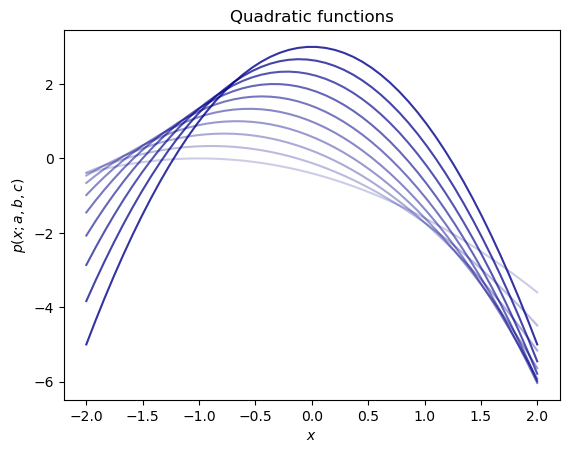

In [149]:
# Call plotting routine, passing x-values and y-values
# as arguments
plot_quad(xgrid, pvalues)

### Locating maxima using loops

Below is one possible way to implement a function that returns a vector 
of indices, each index storing the location of the maximum 
element in the corresponding row.

In [150]:
# Function to locate the maximum value in each row
def find_max(pvalues):
    # unpack rows and columns from shape attribute
    nrow, ncol = pvalues.shape
    # Create array to store location of maximum for each row.
    # Location is an index, so choose integer array type!
    imax = np.zeros(nrow, dtype=int)

    # iterate over all row
    for i in range(nrow):
        # initial guess for location of row maximum
        jmax = 0
        # iterate over all columns, locate index of maximum
        for j in range(1, ncol):
            if pvalues[i,j] > pvalues[i,jmax]:
                # value at (i,j) is larger than
                # value at current max: 
                # update jmax
                jmax = j
        # store index of maximum for current row
        imax[i] = jmax
    
    return imax

In [151]:
# use find_max() to locale indices of each row maximum
ipmax = find_max(pvalues)
ipmax

array([12, 14, 15, 16, 18, 19, 20, 22, 23, 24])

We plot the polynomials using the function we defined above. We then 
add the maxima to the *same* plot.

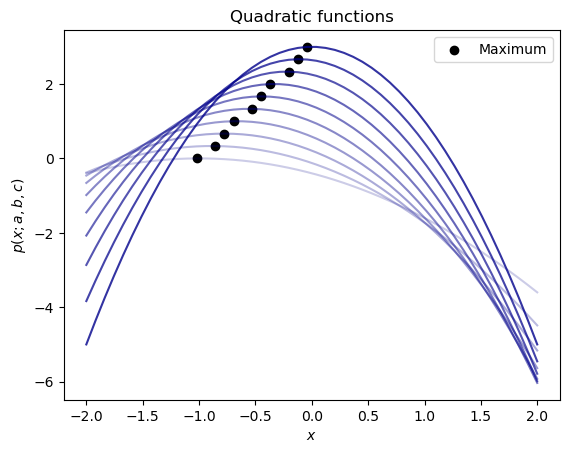

In [152]:
# Recreate original plot from above
plot_quad(xgrid, pvalues)

# Plot maxima on top of previous graph
ix = np.arange(m)
plt.scatter(xgrid[ipmax], pvalues[ix,ipmax], c='black', label='Maximum')
plt.legend()

### Vectorised version

The vectorised version simply uses NumPy's `np.argmax()` function. We need to
pass the argument `axis = 1` as the maximum should be computed across all columns
for any given row.

In [153]:
# Find row maxima using np.argmax()

ipmax2 = np.argmax(pvalues, axis=1)
ipmax2

array([12, 14, 15, 16, 18, 19, 20, 22, 23, 24])

We verify that the results of our and NumPy's implementation are 
identical. Since the values here are integers, we can directly
compare them using `==`. 

In [154]:
# Check that these are the same as what we computed above
np.all(ipmax == ipmax2)

True

Finally, we benchmark both implementations using `%timeit`. The NumPy version is approximately
100 times faster!

In [155]:
# Time our manual implementation
%timeit find_max(pvalues)

97.2 µs ± 333 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [156]:
# Time NumPy's implementation
%timeit np.argmax(pvalues, axis=1)

1.37 µs ± 4.75 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
